In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "./data/"
files = os.listdir(path)
dfs = {
    name.split(".")[0]: pd.read_csv(os.path.join(path, name)) 
    for name in files
    if name.split(".")[1] == "csv"
    }

In [4]:
dfs.keys()

dict_keys(['cdot_traffic_2012_2022'])

In [5]:
cdot_df = dfs["cdot_traffic_2012_2022"]

In [6]:
cdot_df["year"] = cdot_df["Date"].apply(lambda x: x.split("-")[0])

In [7]:
cdot_df.head()

,Station,Date,Direction,Hour,Count,Weekday,year
0,4,2012-01-01,P,0,444,Sunday,2012
1,4,2012-01-01,S,0,407,Sunday,2012
2,4,2012-01-02,P,0,119,Monday,2012
3,4,2012-01-02,S,0,220,Monday,2012
4,4,2012-01-03,P,0,160,Tuesday,2012


In [8]:
cdot_df.describe()

,Station,Hour,Count
count,335880.000000,335880.000000,335880.000000
mean,235.618435,11.500000,1681.358441
std,249.323692,6.922197,1187.500610
min,4.000000,0.000000,0.000000
25%,4.000000,5.750000,497.000000
50%,4.000000,11.500000,1667.000000
75%,504.000000,17.250000,2600.000000
max,504.000000,23.000000,6361.000000


array([[<AxesSubplot: title={'center': 'Station'}>,
        <AxesSubplot: title={'center': 'Hour'}>],
       [<AxesSubplot: title={'center': 'Count'}>, <AxesSubplot: >]],
      dtype=object)

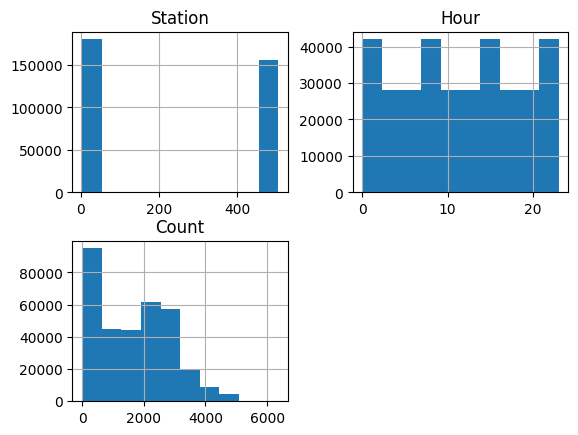

In [9]:
cdot_df.hist()

In [10]:
cdot_df["year"] = cdot_df["Date"].apply(lambda x: x.split("-")[0])

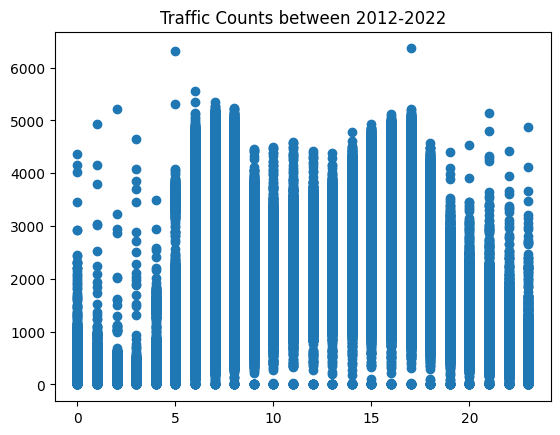

In [11]:
x = cdot_df.Hour.values
y = cdot_df.Count.values

plt.scatter(x, y)
plt.title("Traffic Counts between 2012-2022")
plt.show()

In [12]:
drop_cols = ["Station", "Date", "Direction", "Weekday"]
hour_counts_avg = cdot_df.drop(drop_cols, axis=1).groupby(["Hour"]).agg([np.mean])

In [13]:
cdot_df

,Station,Date,Direction,Hour,Count,Weekday,year
0,4,2012-01-01,P,0,444,Sunday,2012
1,4,2012-01-01,S,0,407,Sunday,2012
2,4,2012-01-02,P,0,119,Monday,2012
3,4,2012-01-02,S,0,220,Monday,2012
4,4,2012-01-03,P,0,160,Tuesday,2012
...,...,...,...,...,...,...,...
335875,504,2022-12-29,S,23,556,Thursday,2022
335876,504,2022-12-30,P,23,554,Friday,2022
335877,504,2022-12-30,S,23,664,Friday,2022
335878,504,2022-12-31,P,23,507,Saturday,2022


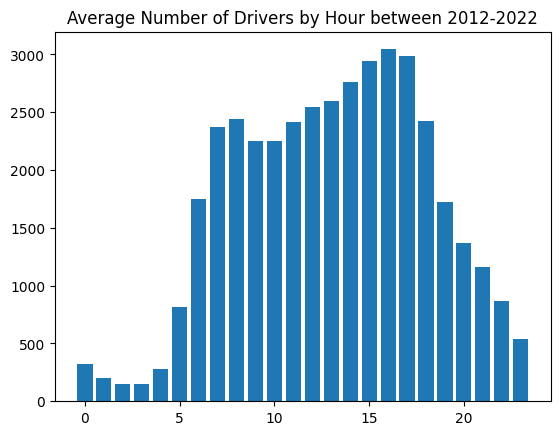

In [14]:
# Average drivers at each hour of the day for the years from 2012 to 2022
x = hour_counts_avg["Count"]["mean"].index
y = hour_counts_avg["Count"]["mean"].values

plt.bar(x, y)
plt.title("Average Number of Drivers by Hour between 2012-2022")
plt.show()

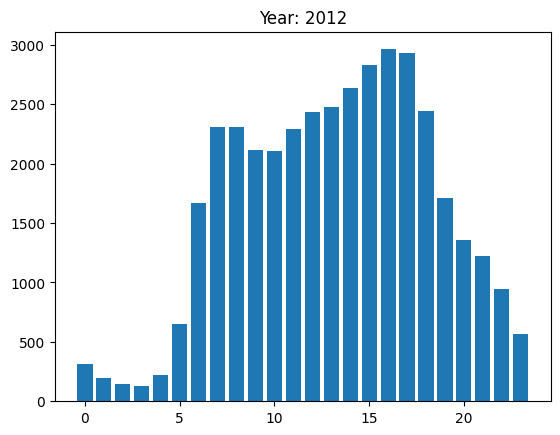

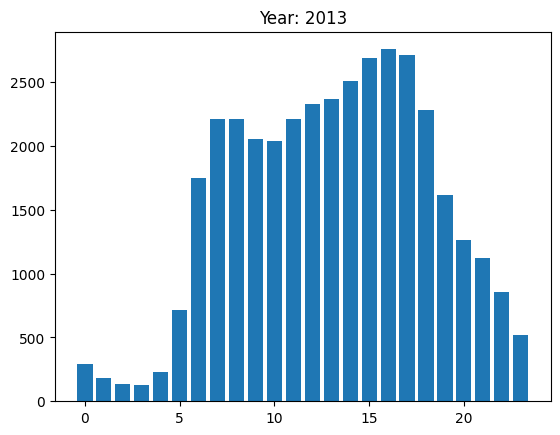

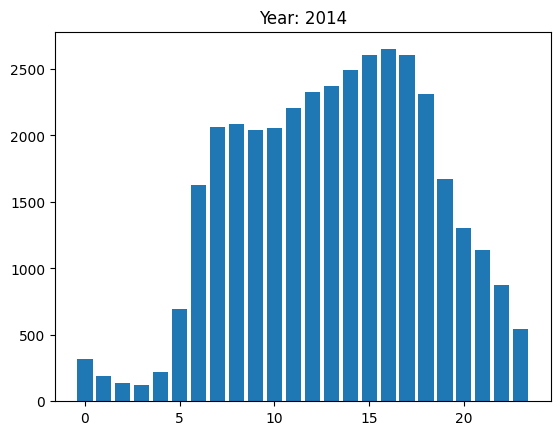

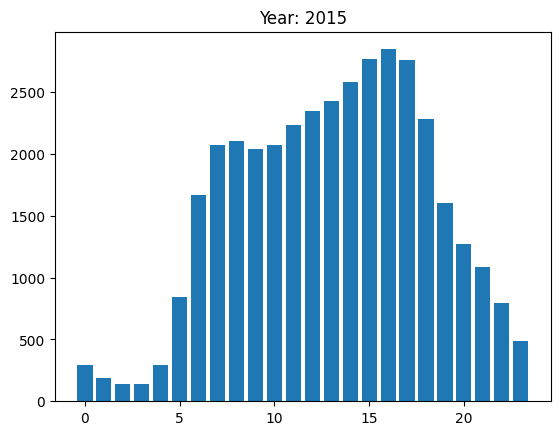

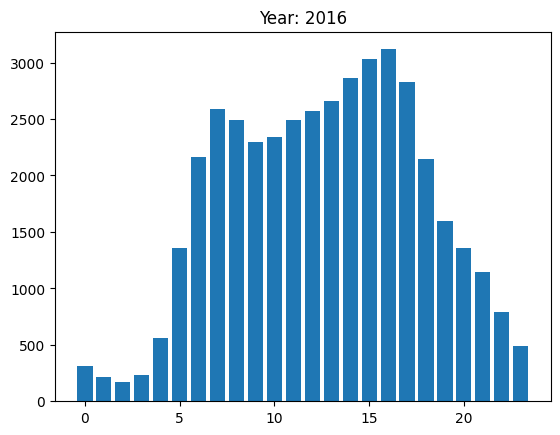

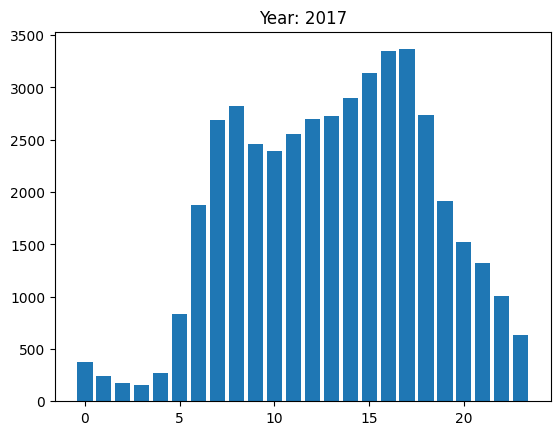

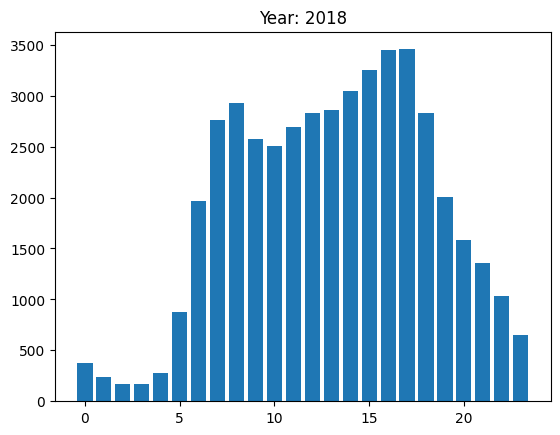

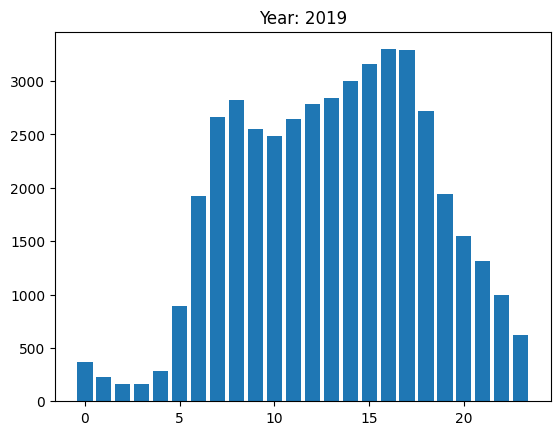

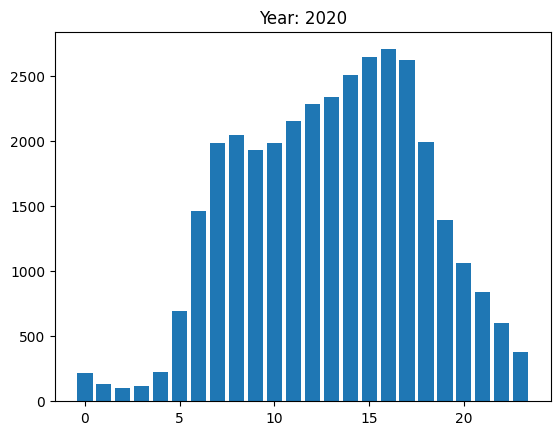

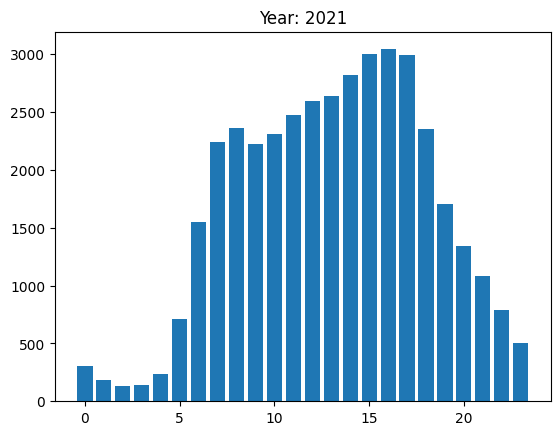

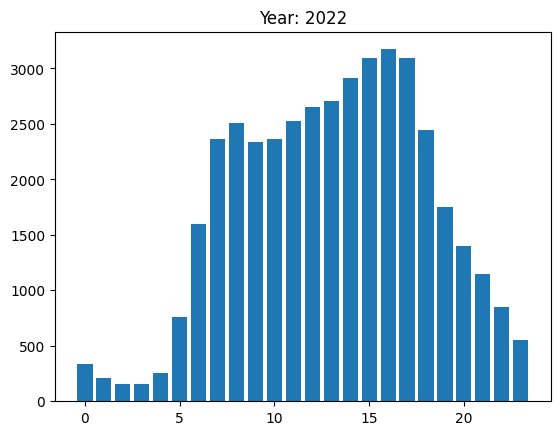

In [15]:
drop_cols = ["Station", "Date", "Direction", "Weekday"]
new_hour_counts_avg = cdot_df.drop(drop_cols, axis=1).groupby(["year", "Hour"]).agg([np.mean]).reset_index()

for year in new_hour_counts_avg["year"].unique():
    year_hour_avg = new_hour_counts_avg[new_hour_counts_avg["year"] == year]
    x = year_hour_avg["Hour"]
    y = year_hour_avg["Count"]["mean"]

    plt.bar(x, y)
    plt.title("Year: %s" % year)
    plt.show()

In [16]:
hour_counts_avg = hour_counts_avg.drop("year", axis=1).reset_index()

<AxesSubplot: title={'center': 'Count'}, xlabel='Hour'>

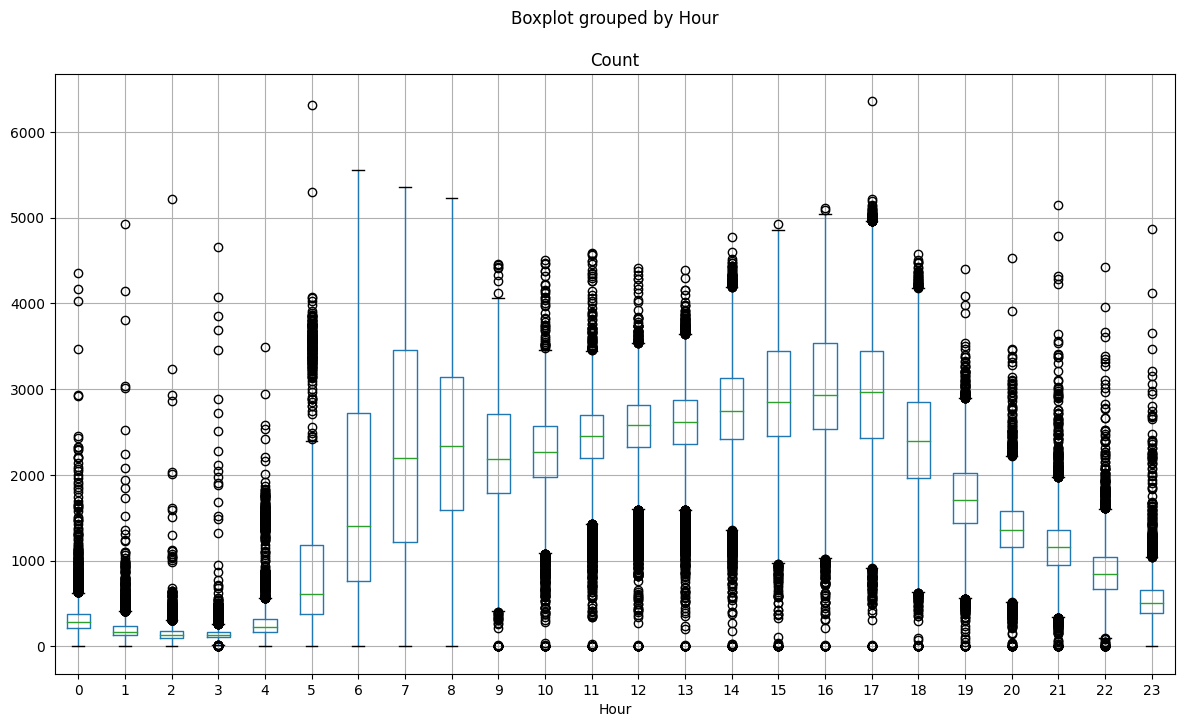

In [17]:
cdot_df.boxplot("Count", by="Hour", figsize=(14, 8))

In [18]:
B_line_peakservice_min = 30
total_capacity = 172

theoretical_capacity = (total_capacity * B_line_peakservice_min) * 2
print(f"{theoretical_capacity:,} passengers per Hour")

times_cap = theoretical_capacity / max(cdot_df.Count.values)
print(f"Theoretical Capacity for Light Rail moves {times_cap:.3f}x more passengers compared to driving.")

10,320 passengers per Hour
Theoretical Capacity for Light Rail moves 1.622x more passengers compared to driving.


In [19]:
on_road_ghg_df = pd.read_excel("./data/2019_Denver_GHG_Inventory.xlsx", sheet_name="On-Road Data")
bus_ghg_df = pd.read_excel("./data/2019_Denver_GHG_Inventory.xlsx", sheet_name="Transit Data")
railway_ghg_df = pd.read_excel("./data/2019_Denver_GHG_Inventory.xlsx", sheet_name="Railways Data")

on_road_emissions_total = on_road_ghg_df.iloc[4, 1]
bus_emissions_total = bus_ghg_df.iloc[4, 1]
railway_emissions_total = railway_ghg_df.iloc[4, 1]

In [20]:
import math

total_diff = on_road_emissions_total / (bus_emissions_total + railway_emissions_total)
print(f"On-road traffic produced {math.ceil(total_diff)}x more emissions than public transit in 2019.")

On-road traffic produced 25x more emissions than public transit in 2019.
